In [1]:
import numpy as np
from scipy.linalg import expm

A = np.array([[1,1,0],
             [0,0,2],
             [0,0,-1]])
A = np.asmatrix(A)
print(A)
print(expm(A))

[[ 1  1  0]
 [ 0  0  2]
 [ 0  0 -1]]
[[2.71828183 1.71828183 1.08616127]
 [0.         1.         1.26424112]
 [0.         0.         0.36787944]]


In [2]:
# Manipulação das matrizes, soma e subtração

def somar(A, B):
    C = []
    num_linhas_a = len(A)
    num_colunas_a = len(A[0])
    
    for i in range (num_linhas_a):
        linha = [0]*num_colunas_a
        C.append(linha)
        for j in range(num_colunas_a):
            C[i][j] = A[i][j] + B[i][j]

    return C

def sub(A, B):
    C = []
    num_linhas_a = len(A)
    num_colunas_a = len(A[0])
    
    for i in range (num_linhas_a):
        linha = [0]*num_colunas_a
        C.append(linha)
        for j in range(num_linhas_a):
            C[i][j] = A[i][j] - B[i][j]

    return C

In [3]:
TAMANHO = 5000
TEMPO = 50
PASSO = TEMPO/TAMANHO

In [4]:
# Plotagem 2D e 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

def plot_componentes(valores_onda, evolucao_d, componente):
    
    ts1 = np.linspace(0, TEMPO, TAMANHO)
    ts2 = np.linspace(0, TEMPO, TAMANHO)
    
    real_primeiro = [elemento.real for elemento in valores_onda[componente-1]]
    imaginario_primeiro = [elemento.imag for elemento in valores_onda[componente-1]]
    
    real_segundo = [elemento.real for elemento in evolucao_d[componente-1]]
    imaginario_segundo = [elemento.imag for elemento in evolucao_d[componente-1]]
    
    # Plotagem
    plt.subplot(2,1,1)

    plt.ylabel('Pesos') 
    plt.xlabel('Tempo') 
    plt.title(f"{componente}ª componente -> real")
    plt.plot(ts1, real_primeiro, color='r', marker='*', linewidth=1, markersize=1, label="primeiro")
    plt.plot(ts2, real_segundo, color='b', marker='o',  linewidth=1, markersize=1, label="segundo")
    plt.legend(loc='upper right')
    
    plt.subplot(2,1,2)

    plt.ylabel('Imaginário') 
    plt.xlabel('Tempo') 
    plt.title(f"{componente}ª componente -> imaginária")
    plt.plot(ts1, imaginario_primeiro, color='r', marker='*', linewidth=1, markersize=1, label="primeiro")
    plt.plot(ts2, imaginario_segundo, color='b', marker='o',  linewidth=1, markersize=1, label="segundo")
    plt.legend(loc='upper right')

    plt.tight_layout()
    

In [5]:
PSI = np.ones((2,2), dtype=np.complex_)
PSI = [[0.80],[0.60]]
H = np.ones((2,2), dtype=np.complex_)
ro = np.matmul(PSI, np.transpose(PSI))

for i in range(0, 5):
    
    H = [[np.exp(-1j*np.pi*i/2),0],[0,np.exp(1j*np.pi*i/2)]]
    U = H
    U = np.asmatrix(U)
    U_dagger = U.getH()
    print("-----------")
    print(f"{i}pi")
    print(np.matmul(np.matmul(U,ro),U_dagger))
    print("-----------")

-----------
0pi
[[0.64+0.j 0.48+0.j]
 [0.48+0.j 0.36+0.j]]
-----------
-----------
1pi
[[ 0.64+0.00000000e+00j -0.48-5.87830464e-17j]
 [-0.48+5.87830464e-17j  0.36+0.00000000e+00j]]
-----------
-----------
2pi
[[0.64+0.00000000e+00j 0.48+1.17566093e-16j]
 [0.48-1.17566093e-16j 0.36+0.00000000e+00j]]
-----------
-----------
3pi
[[ 0.64+0.00000000e+00j -0.48-1.76349139e-16j]
 [-0.48+1.76349139e-16j  0.36+0.00000000e+00j]]
-----------
-----------
4pi
[[0.64+0.00000000e+00j 0.48+2.35132185e-16j]
 [0.48-2.35132185e-16j 0.36+0.00000000e+00j]]
-----------


In [6]:
PSI = np.ones((2,2), dtype=np.complex_)
PSI = [[0.80],[0.60]]
H = np.ones((2,2), dtype=np.complex_)
ro = np.matmul(PSI, np.transpose(PSI))

for i in range(0, 50, 10):
    
    H = [[np.exp(-1j*np.pi*i/2),0],[0,np.exp(1j*np.pi*i/2)]]
    U = H
    U = np.asmatrix(U)
    U_dagger = U.getH()
    print("-----------")
    print(f"{i}pi")
    print(np.matmul(np.matmul(U,ro),U_dagger))
    print("-----------")

-----------
0pi
[[0.64+0.j 0.48+0.j]
 [0.48+0.j 0.36+0.j]]
-----------
-----------
10pi
[[0.64+0.00000000e+00j 0.48+5.87830464e-16j]
 [0.48-5.87830464e-16j 0.36+0.00000000e+00j]]
-----------
-----------
20pi
[[0.64+0.00000000e+00j 0.48+1.17566093e-15j]
 [0.48-1.17566093e-15j 0.36+0.00000000e+00j]]
-----------
-----------
30pi
[[0.64+0.00000000e+00j 0.48+5.17409652e-15j]
 [0.48-5.17409652e-15j 0.36+0.00000000e+00j]]
-----------
-----------
40pi
[[0.64+0.00000000e+00j 0.48+2.35132185e-15j]
 [0.48-2.35132185e-15j 0.36+0.00000000e+00j]]
-----------


In [7]:
def dpsi_dt(t, ro, H): # A derivada da ro em relação ao tempo não tem dependência temporal
    A = np.zeros((2,2), dtype=np.complex_)
    A = (np.dot(H,ro))-(np.dot(ro, H)) # [H,p]
    return -1j*A

# Runge-Kutta de quarta ordem

def runge_kutta(onda, fator_runge_kutta, hamiltoniano, tempo_inicial = 0):

    k1 = dpsi_dt(tempo_inicial, onda, hamiltoniano)
    k2 = dpsi_dt(tempo_inicial + 0.5 * fator_runge_kutta, somar(onda, np.dot((0.5*fator_runge_kutta), k1)), hamiltoniano)
    k3 = dpsi_dt(tempo_inicial + 0.5 * fator_runge_kutta, somar(onda, np.dot((0.5*fator_runge_kutta), k2)), hamiltoniano)
    k4 = dpsi_dt(tempo_inicial + fator_runge_kutta, somar(onda, np.dot(fator_runge_kutta, k3)), hamiltoniano)
    
    ## y(i+1) = y(i) + h/6*(k1+2*k2+2*k3+k4)
    
    A = somar(np.dot(2,k3), k4)
    B = somar(np.dot(2,k2), k1)
    C = somar(A, B)

    runge = somar(onda,np.dot((fator_runge_kutta / 6.0),(C)))
    
    return runge

In [8]:
H1 = [[1/2*np.pi,0],[0,-1/2*np.pi]]
for i in range(0, 50, 10):

    teste = runge_kutta(ro, PASSO, H1)
    print("-----------")
    print(f"{i}pi")
    print(teste)
    print("-----------")
    ro = teste

-----------
0pi
[[(0.6400000000000001+0j), (0.47976314897619204-0.015077164235096582j)], [(0.47976314897619204+0.015077164235096582j), (0.36+0j)]]
-----------
-----------
10pi
[[(0.6400000000000001+0j), (0.4790528296545412-0.030139449129421486j)], [(0.4790528296545412+0.030139449129421486j), (0.36+0j)]]
-----------
-----------
20pi
[[(0.6400000000000001+0j), (0.47786974303445495-0.04517199002651723j)], [(0.47786974303445495+0.04517199002651723j), (0.36+0j)]]
-----------
-----------
30pi
[[(0.6400000000000001+0j), (0.4762150566795789-0.060159951623660265j)], [(0.4762150566795789+0.060159951623660265j), (0.36+0j)]]
-----------
-----------
40pi
[[(0.6400000000000001+0j), (0.47409040356555243-0.07508854261251346j)], [(0.47409040356555243+0.07508854261251346j), (0.36+0j)]]
-----------


In [9]:
PSI = np.ones((2,2), dtype=np.complex_)
PSI = [[0.80],[0.60]]
H = np.ones((2,2), dtype=np.complex_)
ro = np.matmul(PSI, np.transpose(PSI))

for i in range(0, 5):
    
    H = [[np.exp(-1j*np.pi*i/2),0],[0,np.exp(1j*np.pi*i/2)]]
    U = H
    U = np.asmatrix(U)
    U_dagger = U.getH()
    print("-----------")
    print(f"{i}pi")
    print(np.matmul(np.matmul(U,ro),U_dagger))
    print("-----------")

-----------
0pi
[[0.64+0.j 0.48+0.j]
 [0.48+0.j 0.36+0.j]]
-----------
-----------
1pi
[[ 0.64+0.00000000e+00j -0.48-5.87830464e-17j]
 [-0.48+5.87830464e-17j  0.36+0.00000000e+00j]]
-----------
-----------
2pi
[[0.64+0.00000000e+00j 0.48+1.17566093e-16j]
 [0.48-1.17566093e-16j 0.36+0.00000000e+00j]]
-----------
-----------
3pi
[[ 0.64+0.00000000e+00j -0.48-1.76349139e-16j]
 [-0.48+1.76349139e-16j  0.36+0.00000000e+00j]]
-----------
-----------
4pi
[[0.64+0.00000000e+00j 0.48+2.35132185e-16j]
 [0.48-2.35132185e-16j 0.36+0.00000000e+00j]]
-----------


In [10]:
H1 = [[1/2*np.pi,0],[0,-1/2*np.pi]]
for i in range(0, 5):

    teste = runge_kutta(ro, PASSO, H1)
    print("-----------")
    print(f"{i}pi")
    print(teste)
    print("-----------")
    ro = teste

-----------
0pi
[[(0.6400000000000001+0j), (0.47976314897619204-0.015077164235096582j)], [(0.47976314897619204+0.015077164235096582j), (0.36+0j)]]
-----------
-----------
1pi
[[(0.6400000000000001+0j), (0.4790528296545412-0.030139449129421486j)], [(0.4790528296545412+0.030139449129421486j), (0.36+0j)]]
-----------
-----------
2pi
[[(0.6400000000000001+0j), (0.47786974303445495-0.04517199002651723j)], [(0.47786974303445495+0.04517199002651723j), (0.36+0j)]]
-----------
-----------
3pi
[[(0.6400000000000001+0j), (0.4762150566795789-0.060159951623660265j)], [(0.4762150566795789+0.060159951623660265j), (0.36+0j)]]
-----------
-----------
4pi
[[(0.6400000000000001+0j), (0.47409040356555243-0.07508854261251346j)], [(0.47409040356555243+0.07508854261251346j), (0.36+0j)]]
-----------


In [11]:
evolucao_1 = np.zeros((1,TAMANHO), dtype=np.complex_)

In [12]:
PSI = np.ones((2,2), dtype=np.complex_)
PSI = [[0.80],[0.60]]
H = np.ones((2,2), dtype=np.complex_)
ro = np.matmul(PSI, np.transpose(PSI))

for i in range(0, TAMANHO):
    
    H = [[np.exp(-1j*np.pi*i/200.0),0],[0,np.exp(1j*np.pi*i/200.0)]]
    U = H
    U = np.asmatrix(U)
    U_dagger = U.getH()
    print("-----------")
    print(f"Valor de pi: {i/100}pi")
    teste = np.dot(np.dot(U,ro),U_dagger)
    teste = np.squeeze(np.asarray(teste))
    print(teste)
    evolucao_1[0][i] = teste[0][1]
    print("-----------")

-----------
Valor de pi: 0.0pi
[[0.64+0.j 0.48+0.j]
 [0.48+0.j 0.36+0.j]]
-----------
-----------
Valor de pi: 0.01pi
[[0.64      +0.00000000e+00j 0.47976315-1.50771644e-02j]
 [0.47976315+1.50771644e-02j 0.36      -8.67361738e-19j]]
-----------
-----------
Valor de pi: 0.02pi
[[0.64      +0.00000000e+00j 0.47905283-3.01394494e-02j]
 [0.47905283+3.01394494e-02j 0.36      -1.73472348e-18j]]
-----------
-----------
Valor de pi: 0.03pi
[[0.64      +0.j         0.47786974-0.04517199j]
 [0.47786974+0.04517199j 0.36      +0.j        ]]
-----------
-----------
Valor de pi: 0.04pi
[[0.64      +0.00000000e+00j 0.47621506-6.01599521e-02j]
 [0.47621506+6.01599521e-02j 0.36      -3.46944695e-18j]]
-----------
-----------
Valor de pi: 0.05pi
[[0.64     +6.93889390e-18j 0.4740904-7.50885432e-02j]
 [0.4740904+7.50885432e-02j 0.36     +0.00000000e+00j]]
-----------
-----------
Valor de pi: 0.06pi
[[0.64      +6.9388939e-18j 0.47149788-8.9943031e-02j]
 [0.47149788+8.9943031e-02j 0.36      +0.0000000e+00

In [13]:
evolucao_2 = np.zeros((1,TAMANHO), dtype=np.complex_)

In [14]:
H1 = [[1/2*np.pi,0],[0,-1/2*np.pi]]
for i in range(0, TAMANHO):

    teste = runge_kutta(ro, PASSO, H1)
    print("-----------")
    print(teste)
    evolucao_2[0][i] = teste[0][1]
    print("-----------")
    ro = teste

-----------
[[(0.6400000000000001+0j), (0.47976314897619204-0.015077164235096582j)], [(0.47976314897619204+0.015077164235096582j), (0.36+0j)]]
-----------
-----------
[[(0.6400000000000001+0j), (0.4790528296545412-0.030139449129421486j)], [(0.4790528296545412+0.030139449129421486j), (0.36+0j)]]
-----------
-----------
[[(0.6400000000000001+0j), (0.47786974303445495-0.04517199002651723j)], [(0.47786974303445495+0.04517199002651723j), (0.36+0j)]]
-----------
-----------
[[(0.6400000000000001+0j), (0.4762150566795789-0.060159951623660265j)], [(0.4762150566795789+0.060159951623660265j), (0.36+0j)]]
-----------
-----------
[[(0.6400000000000001+0j), (0.47409040356555243-0.07508854261251346j)], [(0.47409040356555243+0.07508854261251346j), (0.36+0j)]]
-----------
-----------
[[(0.6400000000000001+0j), (0.4714978804684588-0.08994303027636145j)], [(0.4714978804684588+0.08994303027636145j), (0.36+0j)]]
-----------
-----------
[[(0.6400000000000001+0j), (0.4684400458955605-0.10470875502952301j)],

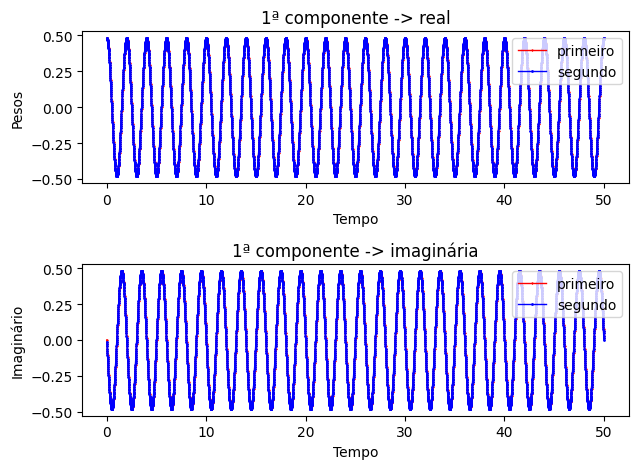

In [15]:
plot_componentes(evolucao_1, evolucao_2, 1)